# KMeans

## Лабораторная работа №3

Присвойте строку с вашим ФИО переменной `name` и выполните ячейку. В ее выводе будет указан номер вашего варианта.

In [10]:
name = "Volgin Aleksey Dmitrievich" # Впишите ваше ФИО
def calculate_variant(name):
    return sum(ord(char) for char in name) % 2 + 1
print(f"Ваш вариант - №{calculate_variant(name)}")

Ваш вариант - №2



---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Волгин Алексей Дмитриевич

Группа: 211-324

Вариант: 2

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/kmeans-1.csv
1. http://labcolor.space/kmeans-2.csv

Скопируйте ссылку для своего варианта.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

## Чтение данных

Используя уже знакомый метод из библиотеки Pandas, считайте данные в формате csv по ссылке из вашего варианта в датафрейм.

Изучите ваш датасет: сколько в нем объектов, сколько признаков, в каких диапазонах изменяются признаки, есть ли в данных целевой признак.

In [3]:
df = pd.read_csv("http://labcolor.space/kmeans-2.csv", dtype={'target':'category'})# Ваш код
df.head()
df.describe()

,370.0,372.4161073825503,374.8322147651007,377.248322147651,379.66442953020135,382.08053691275165,384.496644295302,386.9127516778523,389.3288590604027,391.744966442953,...,708.255033557047,710.6711409395973,713.0872483221476,715.5033557046979,717.9194630872483,720.3355704697987,722.7516778523491,725.1677852348994,727.5838926174497,730.0
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.979670,0.981397,0.984054,0.987103,0.990156,0.993836,0.998397,1.003042,1.008358,1.006987,...,1.001307,0.998017,0.994112,0.989741,0.986050,0.989658,0.991478,0.989219,0.987548,0.985849
std,0.736172,0.737652,0.739094,0.740929,0.743104,0.745420,0.747907,0.750496,0.753590,0.751772,...,0.788050,0.788410,0.789719,0.792078,0.794061,0.790729,0.786894,0.780644,0.775597,0.771149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244692,0.252491,0.261754,0.265595,0.267354,0.270092,0.275081,0.269697,0.272831,0.268470,...,0.264574,0.263102,0.260936,0.256628,0.254779,0.263538,0.269972,0.266905,0.264801,0.262116
50%,0.988965,0.991635,0.995020,0.998552,1.001024,1.004065,1.007607,1.011000,1.014308,1.010384,...,0.401366,0.399032,0.394822,0.383237,0.371835,0.375681,0.381975,0.391916,0.401895,0.411956
75%,1.678961,1.687208,1.699924,1.708823,1.712280,1.714856,1.724840,1.735440,1.746327,1.746842,...,1.811257,1.806093,1.806899,1.801259,1.794684,1.790806,1.790046,1.786441,1.782557,1.778888
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**Опишите ваши данные.**

Сколько в нем объектов: **80**

Сколько признаков: **20**

В каких диапазонах изменяются признаки: **[0; 2]**

Есть ли в данных целевой признак: **Нет**

## Кластеризация

Когда решалась задача классификации с помощью алгоритма knn в наших данных был целевой признак, по которому можно было определить количество классов. При решении задачи кластеризации мы заранее не имеем информации, по которой мы можем задать количество кластеров, поэтому пока при создании экземпляра объекта выберите количество кластеров до 20. Не забудьте задать `random_state`.

In [4]:
# Импортируйте класс из соответствующего модуля библиотеки sklearn
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=40, n_init=10)  # Ваш код
kmeans.fit(df)  # Ваш код

KMeans(n_clusters=10, n_init=10, random_state=40)

Опишите своими словами за что отвечают параметры:

n_clusters - **Кол-во кластеров**

init - **Метод инициализации алгоритма**

n_init - **Кол-во итераций для алгоритма**

max_iter - **Максимальное количество итераций обучения**

random_state - **Корень рандома/сид генератора**

После выполнения метода `.fit()` у экземпляра оценщика (estimator) доступны атрибуты `labels_` и `inertia_`.

`labels_` - массив с указаниями индексов кластеров для всех ваших объектов.

Используя `labels_`, посчитайте сколько объектов относится к каждому кластеру.

**Сколько объектов относится к каждому кластеру?**

**Ваш ответ:** 10

In [5]:
kmeans.labels_

array([5, 8, 5, 8, 5, 2, 5, 8, 2, 8, 2, 2, 5, 5, 2, 8, 5, 8, 7, 4, 0, 7,
       4, 0, 7, 7, 7, 4, 4, 4, 7, 4, 0, 4, 7, 4, 7, 0, 4, 0, 3, 9, 3, 9,
       3, 3, 3, 3, 9, 3, 9, 9, 3, 3, 3, 9, 6, 6, 1, 1, 1, 6, 1, 6, 6, 6,
       1, 6, 6, 1, 6, 1, 6, 1, 1, 1, 6, 1, 6, 6])

`inertia_` для KMeans это SSD (Sum of squared distances - сумма квадратов расстояний) или по-другому это еще называют SSE (Sum of Squares Error - сумма квадратов ошибки.)

Если SSD это сумма квадратов расстояний, то между чем и чем рассчитываются расстояния?

**Ваш ответ**: Между элементами и центром кластера

In [6]:
# Выведите значение суммы квадратов расстоянияний для вашей модели

kmeans.inertia_

69.29728388480754

## Подбор количества кластеров

Для подбора оптимального количества кластеров мы воспользуемся графическим методом - "методом локтя" (Elbow Method). Для этого мы создаем множество моделей с разным количеством кластеров, "подгоняем" (fit) их и оцениваем SSD.

Гипотеза, которая позволяет использовать данный метод, заключается в том, что центройд является прототипом кластера, а следовательно объекты должны кучнее располагаться к нему, поэтому сумма квадратов расстояний должна быть меньше.

**А в каком случае для k средних (KMeans) оцениваемые расстояния равны 0?**

**Ваш ответ:** Если кластеры пустые или их количество равно количеству объектов

Теперь ваша задача в цикле создать n моделей и записать их критерий (сумму квадратов расстояний) в словарь (dict).

In [7]:
SSE = {} #критерий квадратных состояний

for k in np.arange(2, 15):  # # Ваш код: в arange укажите в качестве начального значения 2, а конечного число до 20.
  cluster = KMeans(n_clusters=k, random_state=40, n_init=10)  # Ваш код
  cluster.fit(df)  # Ваш код
  SSE[k] = cluster.inertia_

Построим график для оценки, где по оси абсцисс указано количество кластеров, а по оси ординат указано значение, которое описывает сумму квадратов расстояний.

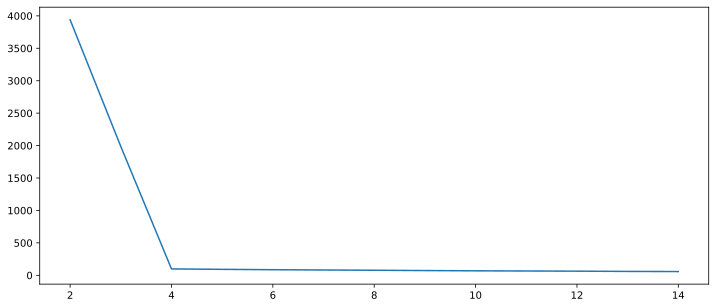

In [8]:
lists = SSE.items()
x, y = zip(*lists)

plt.plot(x, y)
plt.show()

Теперь по графику найдите число кластеров, начиная с которого критерий SSD снижается не так быстро.

Получившееся число кластеров - **4**.

## Итоговая модель

In [9]:
# Создайте финальный вариант модели с подобраным количеством кластеров и обучите ее.

kmeans = KMeans(n_clusters=4, random_state=40, n_init=10)
kmeans.fit(df)
lst = kmeans.labels_
kmeans.labels_
#
# Ваш код
#

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Используя `labels_`, посчитайте сколько объектов относится к каждому кластеру.

**Сколько объектов относится к каждому кластеру?**

**'2' - 18, '0' - 22, '3' - 16, '1' - 24:**

**Кратко опишите суть алгоритма KMeans.**

**Ваш ответ:**

1. Инициализация кластеров (по разным типам расстояний)
1. Создание центроидов в кластерах
1. Разбивка данных по кластерам на основе расстояния между элементами и центроидами
1. Тренировка модели на кластерах 
1. Повторение тренировки до достижения максимального/заданного количества итераций